# Plotting stuff for my research report, CSE527

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os

## Generating delta OGT vs 16S quality plot

In [88]:
sns.set_context('talk')

In [89]:
df_ogt = pd.read_csv('../data/taxa/labels.csv', index_col=0)

In [90]:
df_ogt.describe()

,ogt
count,4424.000000
mean,31.113743
std,8.568326
min,6.000000
25%,28.000000
50%,30.000000
75%,33.500000
max,105.000000


In [91]:
df_16s = pd.read_csv('../data/taxa_pairs/pairwise_16s_blast.csv', index_col=None).sample(1500)

In [92]:
df_16s.describe()

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage
count,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000
mean,8238.049333,8125.683333,1.289193e-16,0.669245,0.601791,0.821998,0.794908
std,4880.364722,4644.770243,3.827073e-15,0.212800,0.245125,0.053451,0.229862
min,24.000000,29.000000,0.000000e+00,0.024069,0.028922,0.718610,0.030148
25%,3841.000000,4043.500000,0.000000e+00,0.642940,0.414327,0.789067,0.634246
50%,8412.000000,8099.000000,0.000000e+00,0.758902,0.686063,0.812500,0.850446
75%,12361.000000,12178.000000,1.569819e-97,0.801335,0.795870,0.835977,0.995341
max,16626.000000,16620.000000,1.428810e-13,0.983871,0.968648,1.000000,0.999360


In [93]:
meso_OGT = df_ogt.loc[df_16s['meso_index']]['ogt']

In [94]:
thermo_OGT = df_ogt.loc[df_16s['thermo_index']]['ogt']

In [95]:
assert len(meso_OGT) == len(thermo_OGT)

In [96]:
delta_OGT = thermo_OGT.values - meso_OGT.values
log_delta_OGT = np.log(delta_OGT)

In [97]:
df_16s['delta_OGT'] = delta_OGT
df_16s['log_delta_OGT'] = log_delta_OGT

In [98]:
df_16s.describe()

,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_delta_OGT
count,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,8238.049333,8125.683333,1.289193e-16,0.669245,0.601791,0.821998,0.794908,25.803133,3.136445
std,4880.364722,4644.770243,3.827073e-15,0.212800,0.245125,0.053451,0.229862,11.850792,0.501039
min,24.000000,29.000000,0.000000e+00,0.024069,0.028922,0.718610,0.030148,1.500000,0.405465
25%,3841.000000,4043.500000,0.000000e+00,0.642940,0.414327,0.789067,0.634246,17.000000,2.833213
50%,8412.000000,8099.000000,0.000000e+00,0.758902,0.686063,0.812500,0.850446,24.000000,3.178054
75%,12361.000000,12178.000000,1.569819e-97,0.801335,0.795870,0.835977,0.995341,33.000000,3.496508
max,16626.000000,16620.000000,1.428810e-13,0.983871,0.968648,1.000000,0.999360,78.000000,4.356709


In [99]:
log_E_value= np.log(df_16s["local_E_value"])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [100]:
df_16s['log_E_value'] = log_E_value

In [101]:
df_16s.describe()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,thermo_index,meso_index,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,local_average_coverage,delta_OGT,log_delta_OGT,log_E_value
count,1500.000000,1500.000000,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,8238.049333,8125.683333,1.289193e-16,0.669245,0.601791,0.821998,0.794908,25.803133,3.136445,-inf
std,4880.364722,4644.770243,3.827073e-15,0.212800,0.245125,0.053451,0.229862,11.850792,0.501039,NaN
min,24.000000,29.000000,0.000000e+00,0.024069,0.028922,0.718610,0.030148,1.500000,0.405465,-inf
25%,3841.000000,4043.500000,0.000000e+00,0.642940,0.414327,0.789067,0.634246,17.000000,2.833213,NaN
50%,8412.000000,8099.000000,0.000000e+00,0.758902,0.686063,0.812500,0.850446,24.000000,3.178054,NaN
75%,12361.000000,12178.000000,1.569819e-97,0.801335,0.795870,0.835977,0.995341,33.000000,3.496508,-223.993505
max,16626.000000,16620.000000,1.428810e-13,0.983871,0.968648,1.000000,0.999360,78.000000,4.356709,-29.576764


<AxesSubplot:xlabel='Local E value', ylabel='$ \\Delta OGT $'>

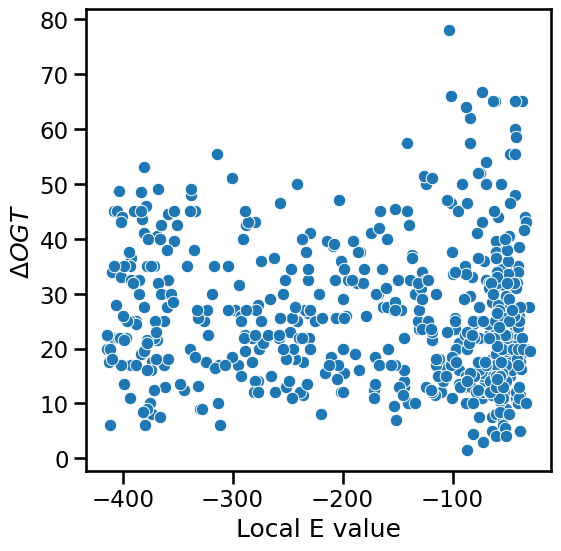

In [102]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('Local E value')
ax.set_ylabel('$ \Delta OGT $')
sns.scatterplot(x='log_E_value', y='delta_OGT', data=df_16s)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


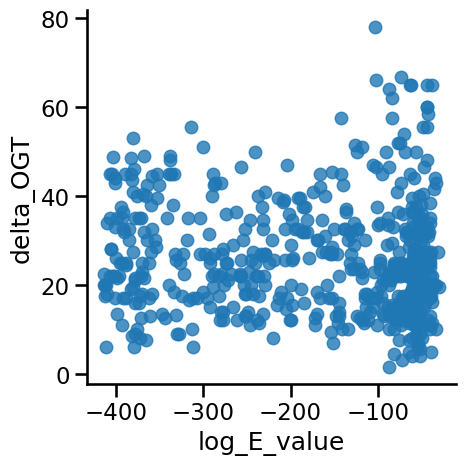

In [103]:
sns.lmplot(x='log_E_value', y='delta_OGT', data=df_16s)

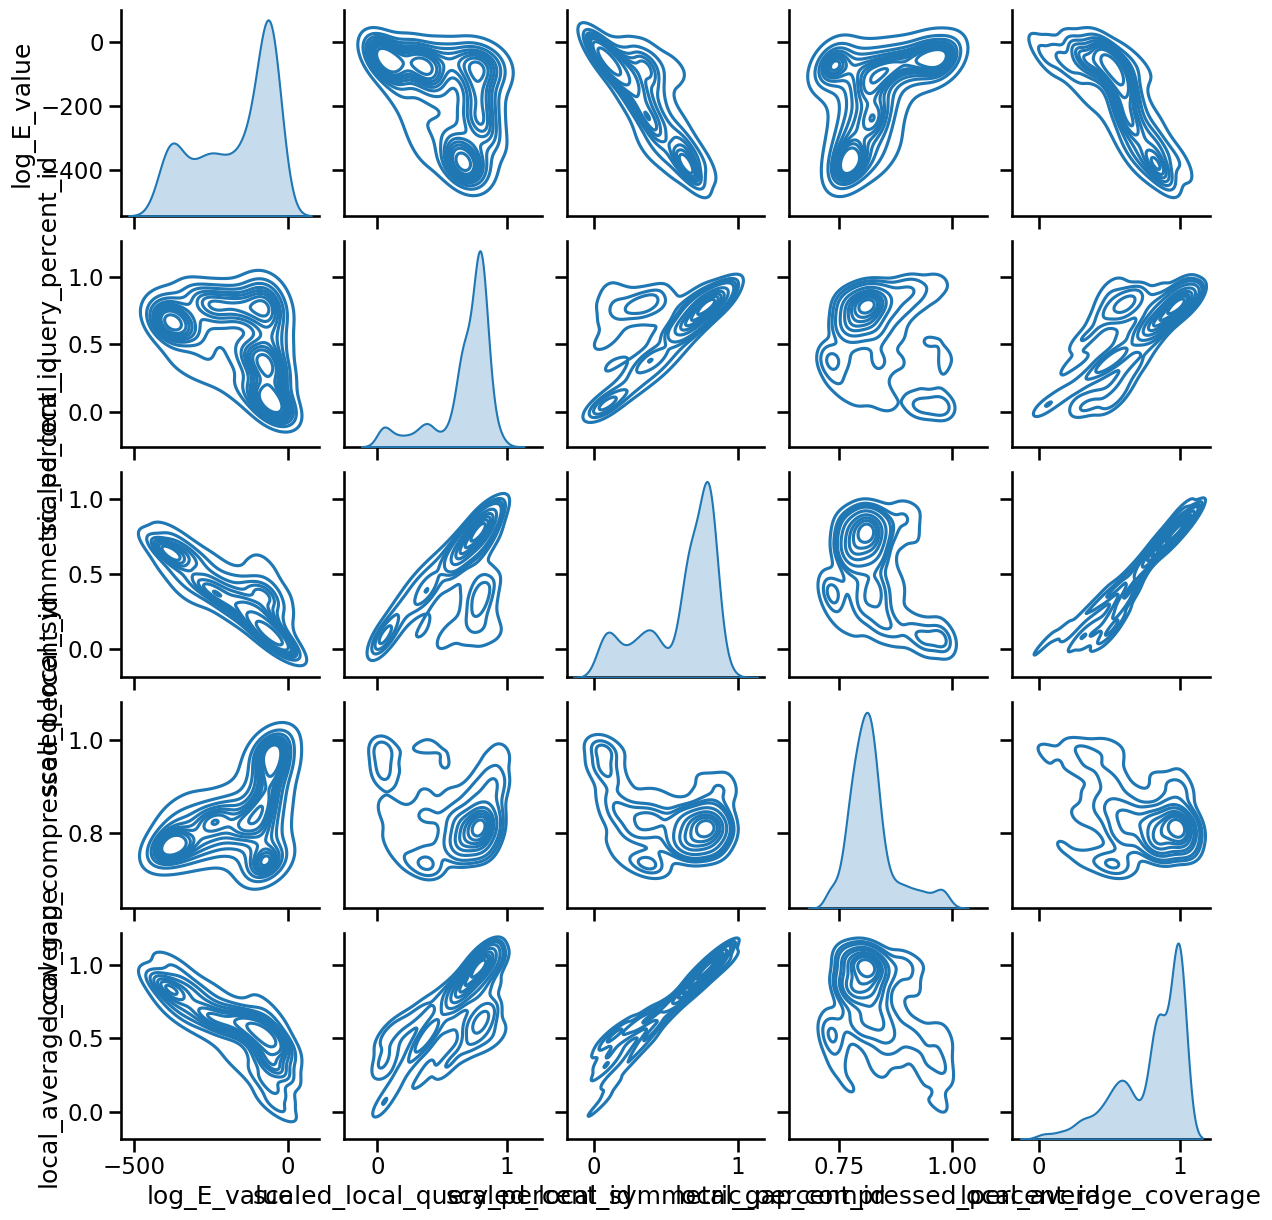

In [104]:
sns.pairplot(data=df_16s[['log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id','local_average_coverage']], kind="kde")

<AxesSubplot:>

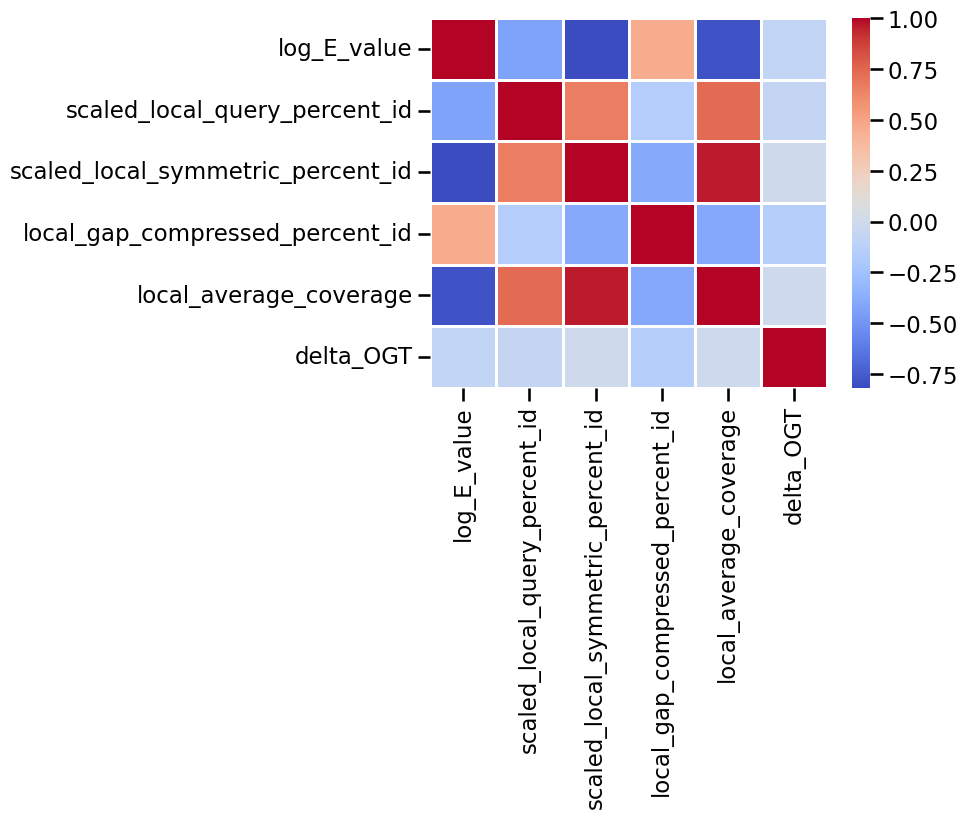

In [105]:
cormat=df_16s[['log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id','local_average_coverage','delta_OGT']].corr()
sns.heatmap(cormat, linewidth=0.75, fmt=".1f", cmap='coolwarm')

The above suggests that the 16S alignment quality is weakly correlated with $ \Delta OGT $ which suggests that the 16S rRNA sequence that defines an organism (taxa) doesn't give us a lot of information apropos if the organism is a mesophile or a thermophile.

## Aiming to generate deltaOGT vs protein alignment quality

In [106]:
# This is my path
path = "../data/taxa_pairs/protein_alignment/"

# to store files in a list
list = []

# dirs=directories
for (root, dirs, file) in os.walk(path):
	for f in file:
		if 'taxa_pair' in f:
			list.append(f)

In [107]:
list

['taxa_pair_14963-4886.csv',
 'taxa_pair_10050-2498.csv',
 'taxa_pair_8919-6836.csv',
 'taxa_pair_7134-7388.csv',
 'taxa_pair_14963-6049.csv',
 'taxa_pair_15190-14746.csv',
 'taxa_pair_7134-8905.csv',
 'taxa_pair_1462-9035.csv',
 'taxa_pair_5381-6187.csv',
 'taxa_pair_7134-15628.csv',
 'taxa_pair_4107-10206.csv',
 'taxa_pair_5381-11261.csv',
 'taxa_pair_10952-1792.csv',
 'taxa_pair_16361-16620.csv',
 'taxa_pair_15966-10926.csv',
 'taxa_pair_1462-2612.csv',
 'taxa_pair_14963-7343.csv',
 'taxa_pair_12872-12178.csv',
 'taxa_pair_1674-10646.csv',
 'taxa_pair_7470-2132.csv',
 'taxa_pair_7134-11328.csv',
 'taxa_pair_37-1613.csv',
 'taxa_pair_10686-10819.csv',
 'taxa_pair_875-5923.csv',
 'taxa_pair_7134-250.csv',
 'taxa_pair_11324-8568.csv',
 'taxa_pair_3606-647.csv',
 'taxa_pair_1724-3735.csv',
 'taxa_pair_5381-15991.csv',
 'taxa_pair_10686-753.csv',
 'taxa_pair_15190-2297.csv',
 'taxa_pair_6626-9613.csv',
 'taxa_pair_10952-14640.csv',
 'taxa_pair_9827-15634.csv',
 'taxa_pair_14963-13002.csv

In [108]:
Listofdf = []
for i in list[0:100]:
    df_ProtPair = pd.read_csv('../data/taxa_pairs/protein_alignment/'+i, index_col=0)
    Listofdf.append(df_ProtPair)

In [109]:
df_AllProPair = pd.concat(Listofdf)

In [113]:
df_AllProPair.describe()

,thermo_protein_id,meso_protein_id,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,Log_E_value
count,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06
mean,9.669166e+03,8.209164e+03,5.516712e-01,2.715572e-01,2.661367e-01,3.446589e-01,-5.171925e+01
std,4.798702e+03,4.604288e+03,4.644963e+00,1.091369e-01,1.108896e-01,9.172283e-02,5.920866e+01
min,3.710000e+01,2.501000e+02,1.730000e-279,7.734807e-02,3.821656e-02,1.522843e-01,-6.418731e+02
25%,5.730297e+03,4.359256e+03,1.230000e-27,2.023810e-01,2.000000e-01,2.920792e-01,-6.196278e+01
50%,9.827350e+03,8.160348e+03,1.540000e-16,2.470588e-01,2.425373e-01,3.227513e-01,-3.640958e+01
75%,1.496318e+04,1.135849e+04,4.570000e-08,3.045455e-01,2.983425e-01,3.632075e-01,-1.690117e+01
max,1.646300e+04,1.662100e+04,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,4.605170e+00


In [111]:
log_protE_value= np.log(df_AllProPair["local_E_value"])

In [112]:
df_AllProPair['Log_E_value'] = log_protE_value

In [122]:
df_AllProPair['thermo_protein_id'].apply(int)

0        14963
1        14963
2        14963
3        14963
4        14963
         ...  
22338    15966
22339    15966
22340    15966
22341    15966
22342    15966
Name: thermo_protein_id, Length: 1282840, dtype: int64

In [117]:
df_ogt.columns

Index(['ogt', 'thermophile_label'], dtype='object')

In [127]:
thermopair_OGT = df_ogt.loc[df_AllProPair['thermo_protein_id'].apply(int)]['ogt']

In [125]:
mesopair_OGT = df_ogt.loc[df_AllProPair['meso_protein_id'].apply(int)]['ogt']

In [128]:
assert len(thermopair_OGT) == len(mesopair_OGT)

In [129]:
delta_OGT_pair = thermopair_OGT.values - mesopair_OGT.values

In [131]:
df_AllProPair['delta_OGT_pair'] = delta_OGT_pair

In [132]:
df_AllProPair.describe()

,thermo_protein_id,meso_protein_id,local_E_value,scaled_local_query_percent_id,scaled_local_symmetric_percent_id,local_gap_compressed_percent_id,Log_E_value,delta_OGT_pair
count,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06,1.282840e+06
mean,9.669166e+03,8.209164e+03,5.516712e-01,2.715572e-01,2.661367e-01,3.446589e-01,-5.171925e+01,1.678851e+01
std,4.798702e+03,4.604288e+03,4.644963e+00,1.091369e-01,1.108896e-01,9.172283e-02,5.920866e+01,6.183858e+00
min,3.710000e+01,2.501000e+02,1.730000e-279,7.734807e-02,3.821656e-02,1.522843e-01,-6.418731e+02,4.000000e+00
25%,5.730297e+03,4.359256e+03,1.230000e-27,2.023810e-01,2.000000e-01,2.920792e-01,-6.196278e+01,1.300000e+01
50%,9.827350e+03,8.160348e+03,1.540000e-16,2.470588e-01,2.425373e-01,3.227513e-01,-3.640958e+01,1.600000e+01
75%,1.496318e+04,1.135849e+04,4.570000e-08,3.045455e-01,2.983425e-01,3.632075e-01,-1.690117e+01,2.000000e+01
max,1.646300e+04,1.662100e+04,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,4.605170e+00,4.100000e+01


<AxesSubplot:>

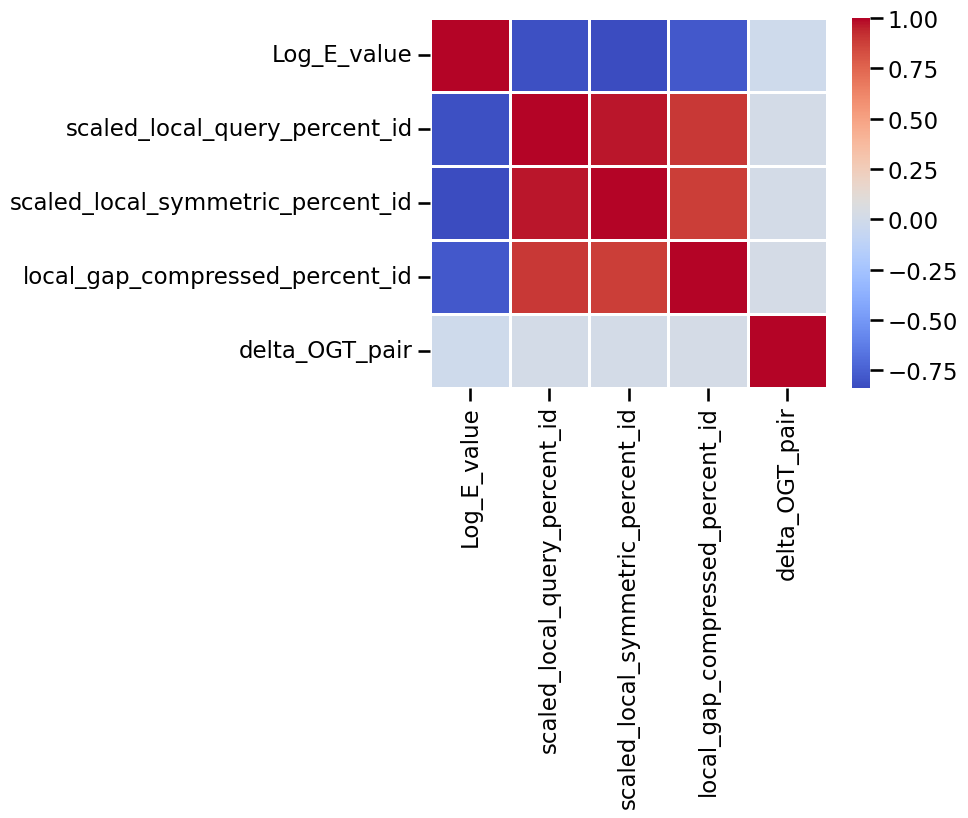

In [134]:
cormat=df_AllProPair[['Log_E_value','scaled_local_query_percent_id','scaled_local_symmetric_percent_id','local_gap_compressed_percent_id','delta_OGT_pair']].corr()
sns.heatmap(cormat, linewidth=0.75, fmt=".1f", cmap='coolwarm')

## Generating number of hits vs 16S quality

In [140]:
df_hits = pd.read_csv('../data/taxa_pairs/protein_alignment/completion_state.metadat', index_col=0)

In [141]:
df_hits.describe()

,pw_space,hits,execution_time,emissions
count,1.411200e+04,14112.000000,13626.000000,2.220000e+03
mean,1.085019e+07,12836.504960,0.940560,2.537075e-04
std,5.955803e+06,9054.429118,0.373517,9.829943e-05
min,1.335740e+06,0.000000,0.373392,4.903634e-07
25%,6.669135e+06,6518.500000,0.645793,1.768345e-04
50%,9.018802e+06,10356.500000,0.886013,2.745913e-04
75%,1.352096e+07,17096.250000,1.108819,3.320908e-04
max,4.996694e+07,89124.000000,3.277508,6.831047e-04


In [139]:
df_hits

,Unnamed: 0,pair,pw_space,hits,execution_time,emissions
0,0,88-12000,2859344,3792,0.404400,0.000113
1,1,1844-1896,7081240,6633,0.533380,0.000158
2,2,49-6698,5544090,6534,0.660562,0.000184
3,3,11324-3104,5273579,4918,0.655736,0.000182
4,4,3841-1514,7549599,6719,0.629755,0.000186
...,...,...,...,...,...,...
14107,14107,12872-2738,20495936,27972,1.047133,NaN
14108,14108,10952-3236,19243680,38700,1.220994,NaN
14109,14109,8919-11428,16556661,39458,1.211858,NaN
14110,14110,10686-6364,9295668,10260,1.105279,NaN


In [153]:
df_hits['pair']

0           88.12000
1         1844.18960
2           49.66980
3        11324.31040
4         3841.15140
            ...     
14107    12872.27380
14108    10952.32360
14109     8919.11428
14110    10686.63640
14111    10952.40460
Name: pair, Length: 14112, dtype: float64

In [152]:
# Bad work around, but time crunch
df_hits['pair'] = df_hits['pair'].str.replace('-', '.').astype(float)

In [154]:
df_hits['pair'].apply(int)

0           88
1         1844
2           49
3        11324
4         3841
         ...  
14107    12872
14108    10952
14109     8919
14110    10686
14111    10952
Name: pair, Length: 14112, dtype: int64

In [156]:
df_16s.loc[df_hits['pair'].apply(int)]['log_E_value']

KeyError: '[88, 1844, 49, 11324, 15683, 16579, 37, 3640, 7134, 3606, 7470, 6048, 10686, 875, 15190, 16462, 10952, 8897, 1674, 4508, 81, 12320, 1462, 8919, 15966, 12872, 1717, 565, 14577, 11707, 14963, 9107, 14004, 3226, 268, 1419, 9301, 5381, 12728, 4904, 4107, 6626, 12717, 3337, 16626, 16099, 10050, 1724, 2999, 2426, 3347, 1906, 2220, 2008, 2389, 2260, 2626, 3628, 3301, 14436, 6260, 2868, 9143, 10208, 3477, 3387, 4141, 16130, 12318, 5202, 4943, 5730, 5801, 6747, 6548, 13664, 6353, 9804, 16507, 16212, 8722, 7760, 8088, 9827, 7918, 8764, 7964, 8529, 10374, 8936, 14062, 10543, 16246, 16320, 9380, 9471, 16306, 14254, 11569, 11286, 12599, 11783, 12784, 12314, 11814, 11401, 11402, 11657, 16131, 12894, 12416, 16361, 13283, 13218, 14721, 16111, 14343, 14582, 16398, 15023, 15077, 15189, 15738, 15061, 16198, 15350, 16105, 16148, 16269, 16273, 16238, 16424, 16440, 16632] not in index'